# Pràctica 2- Efecte de les característiques de les pel·lícules a la seva durada

### Taula de continguts

* [Neteja de les dades](#neteja_de_les_dades)
    * [Selecció dades interès](#selecció_dades_interès)
    * [Identificació zeros i elements buits](#identificació_zeros_i_elements_buits)
    * [Identificació valors extrems](#identificació_valors_extrems)
    * [Identificació valors sentinella](#identificació_valors_sentinella)
    * [Transformació de variables](#transformació_de_variables)
        * [Country](#country)
        * [Language](#language)
        * [Year](#year)
        * [Genres](#genres)
    * [One-hot encoding variables categòriques](#one_hot_encoding_variables_categòriques)
    * [Exportació dades processades](#exportació_dades_processades) 
    
* [Anàlisi de dades](#anàlisi_de_dades)
    * [Selecció de grups](#selecció_de_grups)
    * [Comprovació normalitat i homogeneïtat de la variància](#comprovació_normalitat_i_homogeneïtat_de_la_variància)

* [Proves estadístiques](#proves_estadístiques)
    * [Correlació variables amb la variable duració](#correlació_variables)


In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
import operator
from scipy.stats.stats import pearsonr
from scipy.stats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

### Neteja de les dades <a class="anchor" id="neteja_de_les_dades"></a>

In [2]:
# Load movie dataframe

df = pd.read_excel('movie.xlsx', skiprows=[0])

In [3]:
# Overview dataframe

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### Selecció dades interès <a class="anchor" id="selecció_dades_interès"></a>

In [5]:
keep = ['color', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
        'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'language', 'country',
        'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

filtered_df = df[keep]

#### Identificació zeros i elements buits <a class="anchor" id="identificació_zeros_i_elements_buits"></a>

In [6]:
# Sum of NaN

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)

color 19
num_critic_for_reviews 50
duration 15
director_facebook_likes 104
actor_3_facebook_likes 23
actor_2_facebook_likes 13
actor_1_facebook_likes 7
gross 884
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 21
language 12
country 5
budget 492
title_year 108
imdb_score 0
aspect_ratio 329
movie_facebook_likes 0


In [7]:
# remove NA from director_name, genres, language, country, color

remove_cols = ['genres', 'language', 'country', 'color','title_year']
for r in remove_cols:
    filtered_df = filtered_df[filtered_df[r].notna()]

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)
    
print (np.shape(filtered_df))

color 0
num_critic_for_reviews 40
duration 12
director_facebook_likes 0
actor_3_facebook_likes 18
actor_2_facebook_likes 10
actor_1_facebook_likes 7
gross 762
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 15
language 0
country 0
budget 391
title_year 0
imdb_score 0
aspect_ratio 297
movie_facebook_likes 0
(4913, 19)


In [8]:
# manage missing numerical values

num_cols = ['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 
           'actor_1_facebook_likes', 'gross', 'num_user_for_reviews', 'budget', 'aspect_ratio']

imputer_KNN = KNNImputer(missing_values=np.nan, n_neighbors=3, weights="uniform", metric="nan_euclidean")

for c in num_cols:
    filtered_df[c] = imputer_KNN.fit_transform(filtered_df[c].values.reshape(-1, 1))

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)
    
print (np.shape(filtered_df))

color 0
num_critic_for_reviews 0
duration 0
director_facebook_likes 0
actor_3_facebook_likes 0
actor_2_facebook_likes 0
actor_1_facebook_likes 0
gross 0
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 0
language 0
country 0
budget 0
title_year 0
imdb_score 0
aspect_ratio 0
movie_facebook_likes 0
(4913, 19)


#### Identificació valors extrems <a class="anchor" id="identificació_valors_extrems"></a>

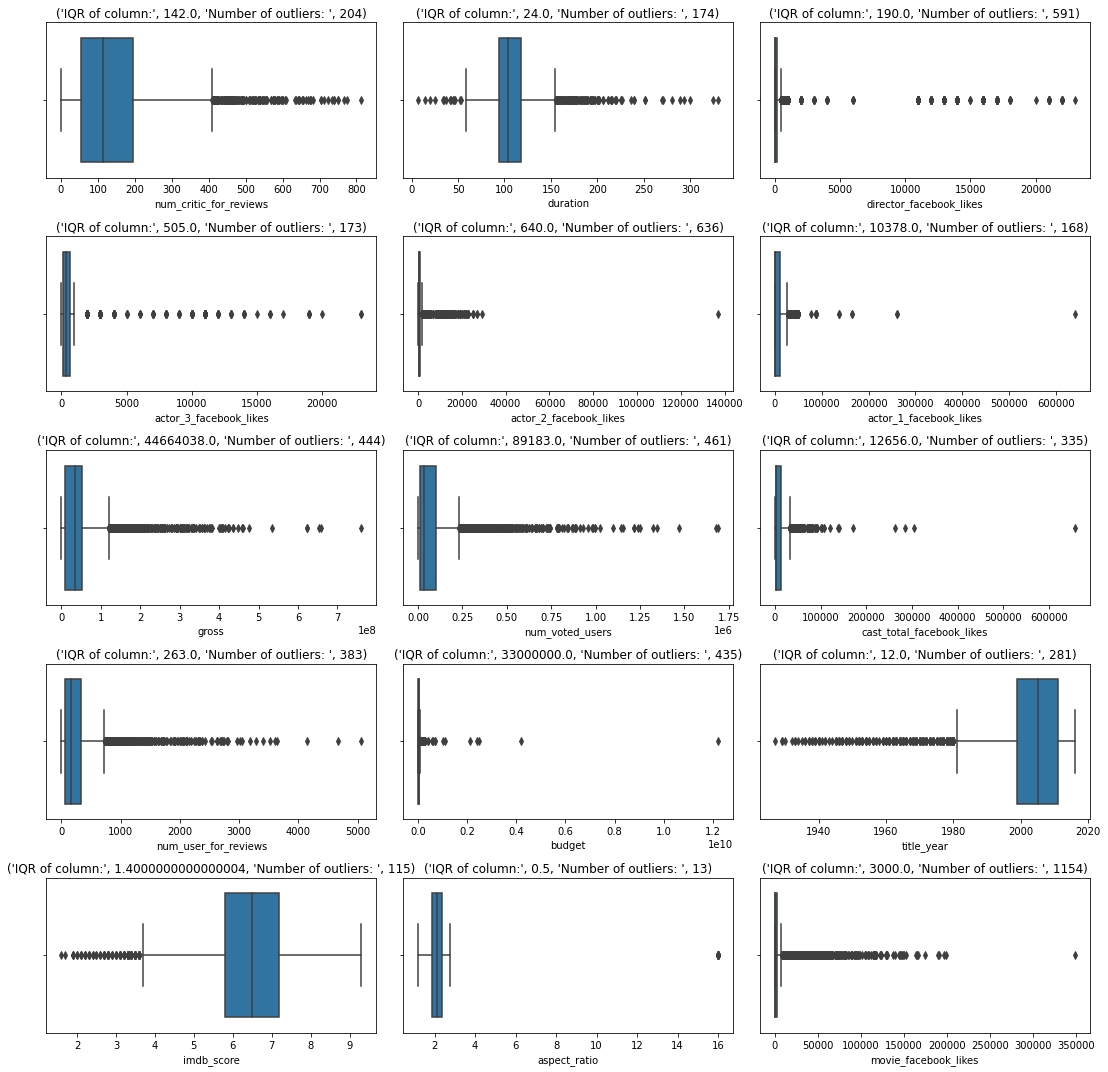

In [9]:
select_num = filtered_df.select_dtypes(include=['float64', 'int64'])
colnames = list(select_num.columns)

fig, axes = plt.subplots(nrows = int(np.shape(select_num)[1]/3), ncols = 3, figsize=(15,15))
y = 0
for name in colnames:
    i, j = divmod(y, 3)
    sns.boxplot(x=filtered_df[name], ax=axes[i, j])
    Q1 = filtered_df[name].quantile(0.25)
    Q3 = filtered_df[name].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_lower = filtered_df[name] < (Q1 - 1.5 * IQR)
    outlier_higher = filtered_df[name] > (Q3 + 1.5 * IQR)
    title = 'IQR of column:', IQR, 'Number of outliers: ',sum(outliers_lower) + sum(outlier_higher)
    axes[i,j].set_title(title)

    y = y + 1

plt.tight_layout()
plt.show()

#### Transformació de variables <a class="anchor" id="transformació_de_variables"></a>

##### Country <a class="anchor" id="country"></a>

In [10]:
filtered_df['country'].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Switzerland', 'Romania',
       'West Germany', 'Chile', 'Netherlands', 'Hungary', 'Panama',
       'Greece', 'Sweden', 'Taiwan', 'Official site', 'Cambodia',
       'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Georgia', 'Iceland',
       'Norway', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Poland', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [11]:
Africa = ('Kenya','Nigeria','Cameroon','Egypt','Libya','South Africa')
Asia = ('United Arab Emirates','Pakistan','Cambodia','Philippines','Afghanistan','Indonesia','Israel','Iran','China','Japan','Hong Kong','India','South Korea','Taiwan','Thailand','Kyrgyzstan')
Europe =('Slovenia','Turkey','Switzerland','Poland','Iceland','Finland',  'Sweden','Georgia', 'Norway','Slovakia', 'Bulgaria','Greece','Russia', 'Netherlands', 'Hungary','Romania', 'West Germany','Ireland','UK','Belgium','Germany','France','Spain','Czech Republic','Soviet Union','Italy','Denmark','Aruba',) 
America =('USA','Dominican Republic','Argentina', 'Colombia','Bahamas','Brazil','USA','Canada','Mexico','Peru','Chile','Panama') 
Oceania =('New Zealand','Australia')

def GetConti(country):
    if country in Africa:
        return "Africa"
    elif country in Asia:
        return "Asia"
    elif country in Europe:
        return "Europe"
    elif country in America:
        return "America"
    elif country in Oceania:
        return "Oceania"
    else:
        return "Other-continent"

filtered_df['Continent']=filtered_df['country'].apply(GetConti)
filtered_df=filtered_df.drop(['country'], axis=1)
filtered_df['Continent'].value_counts()

America            3872
Europe              821
Asia                137
Oceania              68
Africa               13
Other-continent       2
Name: Continent, dtype: int64

In [12]:
filtered_df[filtered_df['Continent']=="Other-continent"]

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Continent
281,Color,62.0,104.0,23.0,591.0,631.0,752.0,6712451.0,Comedy|Romance,4102,3133,89.0,English,90000000.0,2001.0,4.4,1.85,53,Other-continent
2675,Color,135.0,117.0,19.0,461.0,646.0,3000.0,20218921.0,Drama|Music,14814,4204,114.0,English,15000000.0,2010.0,6.3,2.35,0,Other-continent


##### Language <a class="anchor" id="language"></a>

In [13]:
filtered_df['language'].value_counts()

English       4595
French          72
Spanish         40
Hindi           28
Mandarin        25
German          19
Japanese        17
Russian         11
Cantonese       11
Italian         10
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Norwegian        4
Persian          4
Swedish          4
Dutch            4
Chinese          3
Thai             3
None             2
Romanian         2
Dari             2
Indonesian       2
Aboriginal       2
Zulu             2
Filipino         1
Maya             1
Swahili          1
Aramaic          1
Kazakh           1
Kannada          1
Bosnian          1
Vietnamese       1
Polish           1
Czech            1
Dzongkha         1
Greek            1
Tamil            1
Mongolian        1
Slovenian        1
Panjabi          1
Icelandic        1
Urdu             1
Telugu           1
Hungarian        1
Name: language, dtype: int64

In [14]:
def GetLanguage(lan):
    if lan not in ['English','French','Spanish','Mandarin']:
        return 'Other-language'
    else:
        return lan

filtered_df['language']=filtered_df['language'].apply(GetLanguage)

In [15]:
filtered_df['language'].value_counts()

English           4595
Other-language     181
French              72
Spanish             40
Mandarin            25
Name: language, dtype: int64

##### Year <a class="anchor" id="year"></a>

In [16]:
def GetYear(y):
    if y<1960:
        return "<1960"
    elif 1960 <= y < 1980:
        return "1960-1980"
    elif 1980 <= y < 2000:
        return "1980-2000"
    elif 2000 <= y < 2010:
        return "2000-2010"
    elif 2010 <= y < 2020:
        return "2010-2020"
    else:
        return "Unknown"
    
filtered_df['title_year_bins']=filtered_df['title_year'].apply(GetYear)
filtered_df=filtered_df.drop(['title_year'], axis=1)
filtered_df['title_year_bins'].value_counts()

2000-2010    2097
2010-2020    1483
1980-2000    1076
1960-1980     186
<1960          71
Name: title_year_bins, dtype: int64

##### Genres <a class="anchor" id="genres"></a>

In [17]:
# only keep first leave of the genre
def get_genre(g):
    return g.split('|')[0]

filtered_df['main_genre']=filtered_df['genres'].apply(get_genre)
filtered_df=filtered_df.drop(['genres'], axis=1)
filtered_df['main_genre'].value_counts()

Comedy         1294
Action         1129
Drama           934
Adventure       450
Crime           329
Biography       251
Horror          230
Documentary      82
Animation        57
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Music             1
Film-Noir         1
History           1
Name: main_genre, dtype: int64

##### One-Hot Encoding variables categòriques <a class="anchor" id="one_hot_encoding_variables_categòriques"></a>

In [18]:
daux=pd.get_dummies(filtered_df['language'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [19]:
# Comprovació del one hot encoder per exemple per spain
filtered_df.groupby(['language'])['Spanish'].mean()

language
English           0
French            0
Mandarin          0
Other-language    0
Spanish           1
Name: Spanish, dtype: uint8

In [20]:
daux=pd.get_dummies(filtered_df['main_genre'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [21]:
## filtered_df.drop(columns='language', inplace = True) No esborrem la original per si la necessitem

In [22]:
daux=pd.get_dummies(filtered_df['color'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [23]:
daux=pd.get_dummies(filtered_df['title_year_bins'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [24]:
daux=pd.get_dummies(filtered_df['Continent'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

#### Exportació dades processades <a class="anchor" id="exportació_dades_processades"></a>

In [25]:
filtered_df.to_csv('movie_df_filtered.csv')

### Anàlisi de dades <a class="anchor" id="anàlisi_de_dades"></a>

#### Selecció de grups <a class="anchor" id="selecció_de_grups"></a>

In [26]:
# selecció segons gross
mean_gross = np.mean(filtered_df['gross'])
high_gross = filtered_df[filtered_df['gross'] >= mean_gross]
low_gross = filtered_df[filtered_df['gross'] < mean_gross]

# selecció segons gènere 
comedy = filtered_df[filtered_df['main_genre'] =='Comedy']
action = filtered_df[filtered_df['main_genre'] =='Action']
drama = filtered_df[filtered_df['main_genre'] =='Drama']

# selecció segons llenguatge
english = filtered_df[filtered_df['language'] =='English']
other = filtered_df[filtered_df['language'] != 'English']

# selecció segons valoració (imdb_score)
high_score = filtered_df[filtered_df['imdb_score'] > 5]
low_score = filtered_df[filtered_df['imdb_score'] <= 5]

#### Comprovació normalitat i homogeneïtat de la variància <a class="anchor" id="comprovació_normalitat_i_homogeneïtat_de_la_variància"></a>

Primer comprovarem la normalitat de totes les variables.

In [27]:
alpha = 0.05
for l in filtered_df.columns:
    if l not in ['color', 'language', 'main_genre', 'title_year_bins', 'Continent', 'duration']:
        x, p = stats.normaltest(filtered_df[l])
        if p < alpha:
            print('The null hypothesis can be rejected', l)
        else:
            print('The null hypothesis CANNOT be rejected', l)

The null hypothesis can be rejected num_critic_for_reviews
The null hypothesis can be rejected director_facebook_likes
The null hypothesis can be rejected actor_3_facebook_likes
The null hypothesis can be rejected actor_2_facebook_likes
The null hypothesis can be rejected actor_1_facebook_likes
The null hypothesis can be rejected gross
The null hypothesis can be rejected num_voted_users
The null hypothesis can be rejected cast_total_facebook_likes
The null hypothesis can be rejected num_user_for_reviews
The null hypothesis can be rejected budget
The null hypothesis can be rejected imdb_score
The null hypothesis can be rejected aspect_ratio
The null hypothesis can be rejected movie_facebook_likes
The null hypothesis can be rejected English
The null hypothesis can be rejected French
The null hypothesis can be rejected Mandarin
The null hypothesis can be rejected Other-language
The null hypothesis can be rejected Spanish
The null hypothesis can be rejected Action
The null hypothesis can b

Normalitat i Homoscedasticitat de la durada sobre els grups de les variables categòriques: language,Continent,title_year_bins i main_genre

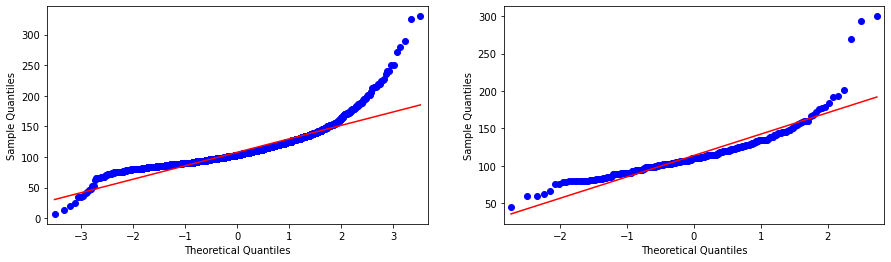

valors observats  2270.9709482210696   201.6611900469274
valors P  0.0   1.6211715522463065e-44
valor P:  0.0002760390004880243  Valor observat:  13.24553913966608


In [39]:
## Llenguatge: english or other.
g1=filtered_df[filtered_df['language'] =='English']['duration']
g2=filtered_df[filtered_df['language'] !='English']['duration']

# normalitat
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
qqplot(g1, line='s', ax = ax[0])
qqplot(g2, line='s', ax=ax[1])
plt.show()
x1, p1 = stats.normaltest(g1)
x2, p2 = stats.normaltest(g2)
print("valors observats ", x1, " ",x2)
print("valors P ",p1," ",p2)

# homoscedasticitat
stat, p = stats.levene(g1,g2)
print("valor P: ",p, " Valor observat: ",stat)

Tal com veiem als qqplots i al test de normalitat, la variable durada NO es normal ni als films en anglés ni als films no anglesos. Per tant aplicarem un test de U-Mannwhitney per veure si hi ha diferències en la durada entre els films anglesos i no anglesos

In [40]:
# TEST U MANN WITHNEY, compare samples
stat, p = mannwhitneyu(g1, g2)
print("valor P: ",p, " Valor observat: ",stat)

valor P:  2.786083015124715e-06  Valor observat:  619520.5


### Proves estadístiques <a class="anchor" id="proves_estadístiques"></a>

#### Correlació variables amb la variable de duració <a class="anchor" id="correlació_variables"></a>

In [45]:
correlation_dict = {}
for i in filtered_df.columns:
    if i not in ['color', 'language', 'main_genre', 'title_year_bins', 'Continent', 'duration']:
        corr, pval = pearsonr(filtered_df['duration'], filtered_df[i]) 
        correlation_dict[i] = [corr, pval]

In [46]:
orderedDict_corr = dict(sorted(correlation_dict.items(), key=lambda t: t[1][1]))
pd.DataFrame.from_dict(orderedDict_corr, orient='index', columns=['correlation', 'pvalue']).head(10)

,correlation,pvalue
num_user_for_reviews,0.352534,9.677374e-144
num_voted_users,0.342481,2.974620e-135
imdb_score,0.342185,5.229846e-135
num_critic_for_reviews,0.250943,1.965519e-71
gross,0.232756,1.952738e-61
movie_facebook_likes,0.218328,4.280753e-54
Comedy,-0.192657,2.719137e-42
director_facebook_likes,0.173426,1.770237e-34
Biography,0.168565,1.220628e-32
actor_2_facebook_likes,0.137036,4.996309e-22
